## Part 1: Basic configuration

###Step 1: Connecting Google Colab with a Google Drive account

In [10]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Step 2: Setting up directory variables and libaries

In [0]:
base_dir = "/content/drive/My Drive/IFG/Topicos IA/Trabalho 2 - Cats vs Dogs/notebooks/dogs_vs_cats_small"
test_dir = "/content/drive/My Drive/IFG/Topicos IA/Trabalho 2 - Cats vs Dogs/notebooks/dogs_vs_cats_small/_test"
train_dir = "/content/drive/My Drive/IFG/Topicos IA/Trabalho 2 - Cats vs Dogs/notebooks/dogs_vs_cats_small/_train"
validation_dir = "/content/drive/My Drive/IFG/Topicos IA/Trabalho 2 - Cats vs Dogs/notebooks/dogs_vs_cats_small/_valid"
train_cats_dir = "/content/drive/My Drive/IFG/Topicos IA/Trabalho 2 - Cats vs Dogs/notebooks/dogs_vs_cats_small/_train/cats"
train_dogs_dir = "/content/drive/My Drive/IFG/Topicos IA/Trabalho 2 - Cats vs Dogs/notebooks/dogs_vs_cats_small/_train/dogs"

In [0]:
from keras import layers
from keras import models
from keras import optimizers
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import VGG16

In [13]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Part 2: Training and saving a model created by a Convnet

###Step 3: Instantiating a small convnet for dogs vs. cats classification

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### Step 4: Configuring the model for training

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

 ### Step 5: Reading images from directories

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [18]:
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


###  Step 6: Fitting the model using a batch generator

In [19]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=20, validation_data=validation_generator, validation_steps=50)

Epoch 1/20
100/100 [==============================] - 406s 4s/step - loss: 0.6901 - acc: 0.5525 - val_loss: 0.6838 - val_acc: 0.5260
Epoch 2/20
100/100 [==============================] - 17s 170ms/step - loss: 0.6591 - acc: 0.6000 - val_loss: 0.6560 - val_acc: 0.6090
Epoch 3/20
100/100 [==============================] - 18s 182ms/step - loss: 0.6181 - acc: 0.6685 - val_loss: 0.6128 - val_acc: 0.6620
Epoch 4/20
100/100 [==============================] - 18s 176ms/step - loss: 0.5828 - acc: 0.6895 - val_loss: 0.5964 - val_acc: 0.6760
Epoch 5/20
100/100 [==============================] - 17s 173ms/step - loss: 0.5522 - acc: 0.7245 - val_loss: 0.5953 - val_acc: 0.6720
Epoch 6/20
100/100 [==============================] - 17s 173ms/step - loss: 0.5276 - acc: 0.7480 - val_loss: 0.5773 - val_acc: 0.6850
Epoch 7/20
100/100 [==============================] - 17s 173ms/step - loss: 0.5005 - acc: 0.7640 - val_loss: 0.5546 - val_acc: 0.7080
Epoch 8/20
100/100 [==============================] - 18s

In [0]:
model.save('cats_and_dogs_small_1.h5')

### Step 7: Displaying curves of loss and accuracy during training

In [0]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

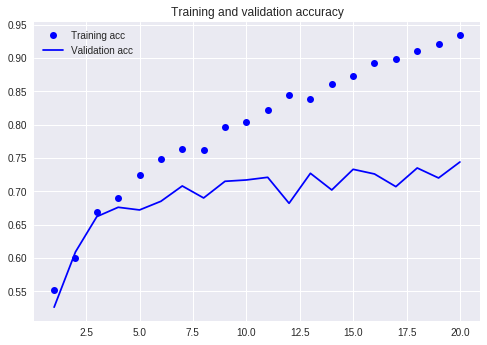

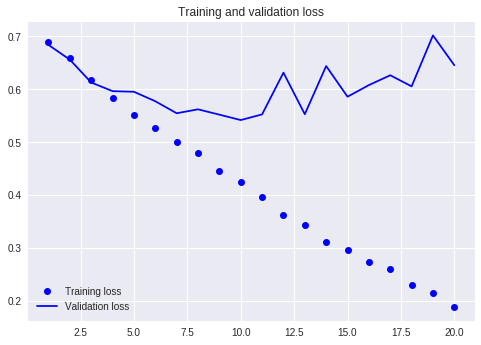

In [22]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Part 3: Using Data Augmentation to avoid overfitting

### Step 8: Setting up a data augmentation configuration via *ImageDataGenerator*

In [0]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

### Step 9: Displaying some randomly augmented training images

In [0]:
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

In [0]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

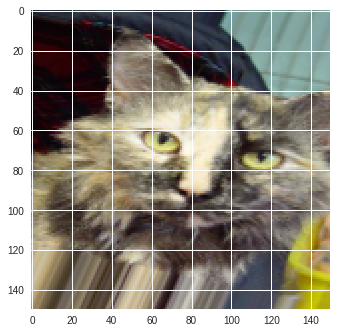

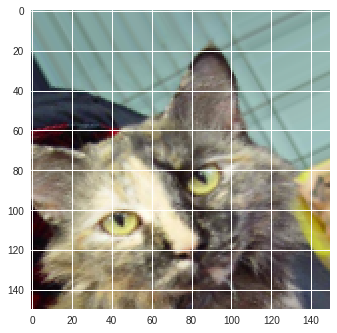

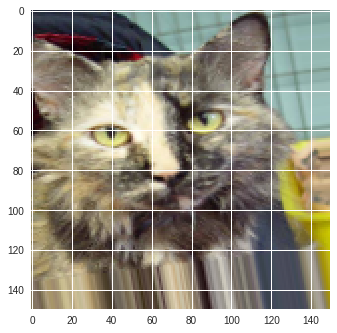

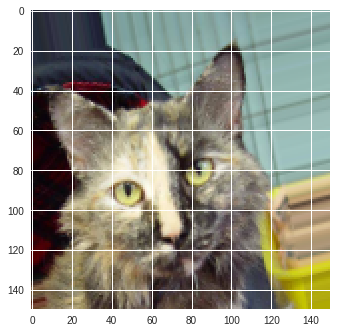

In [26]:
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

### Step 10: Defining a new convnet that includes dropout

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

### Step 11: Evaluating the new network

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory( validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 48s 476ms/step - loss: 0.6930 - acc: 0.5122 - val_loss: 0.6999 - val_acc: 0.5095
Epoch 2/100
100/100 [==============================] - 43s 431ms/step - loss: 0.6797 - acc: 0.5594 - val_loss: 0.7372 - val_acc: 0.5064
Epoch 3/100
100/100 [==============================] - 43s 428ms/step - loss: 0.6705 - acc: 0.5869 - val_loss: 0.6502 - val_acc: 0.6091
Epoch 4/100
100/100 [==============================] - 44s 436ms/step - loss: 0.6539 - acc: 0.6081 - val_loss: 0.6275 - val_acc: 0.6140
Epoch 5/100
100/100 [==============================] - 44s 438ms/step - loss: 0.6315 - acc: 0.6337 - val_loss: 0.6546 - val_acc: 0.5882
Epoch 6/100
100/100 [==============================] - 44s 440ms/step - loss: 0.6117 - acc: 0.6638 - val_loss: 0.5848 - val_acc: 0.6843
Epoch 7/100
100/100 [==============================] - 45s 448ms/step - loss: 0.6098 - acc: 0.6669 - val_loss: 0.5804 - val_acc: 0.6751
Epoch 8/100
100/100 [===========================

In [0]:
model.save('cats_and_dogs_small_2.h5')

### *Plotting results*

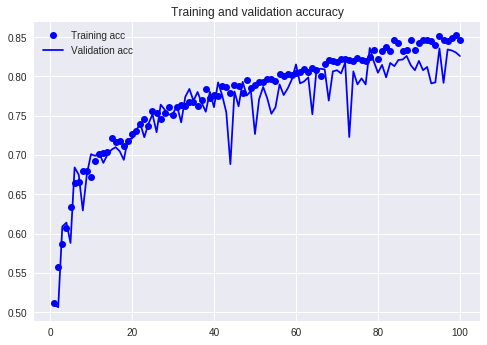

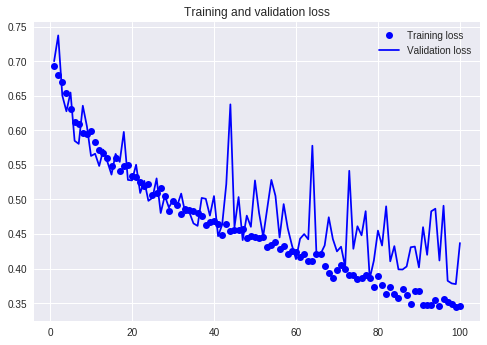

In [32]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Part 3: Using a pretrained convnet

In [33]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool

### 3.1 FAST FEATURE EXTRACTION WITHOUT DATA AUGMENTATION

### Step 12: Extracting features using the pretrained convolutional base

In [0]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

### Step 15: Flattening the images

In [38]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

### Step 16: Defining and training the densely connected classifier

In [40]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 702us/step - loss: 0.6215 - acc: 0.6470 - val_loss: 0.4427 - val_acc: 0.8330
Epoch 2/30
2000/2000 [==============================] - 1s 467us/step - loss: 0.4428 - acc: 0.7975 - val_loss: 0.3680 - val_acc: 0.8500
Epoch 3/30
2000/2000 [==============================] - 1s 504us/step - loss: 0.3588 - acc: 0.8440 - val_loss: 0.3184 - val_acc: 0.8790
Epoch 4/30
2000/2000 [==============================] - 1s 495us/step - loss: 0.3231 - acc: 0.8600 - val_loss: 0.2960 - val_acc: 0.8780
Epoch 5/30
2000/2000 [==============================] - 1s 498us/step - loss: 0.2844 - acc: 0.8850 - val_loss: 0.2791 - val_acc: 0.8850
Epoch 6/30
2000/2000 [==============================] - 1s 495us/step - loss: 0.2697 - acc: 0.8900 - val_loss: 0.2689 - val_acc: 0.8950
Epoch 7/30
2000/2000 [==============================] - 1s 504us/step - loss: 0.2453 - acc: 0.9100 - val_loss: 0.2596 - val_acc: 0.8920


###  *Plotting results*

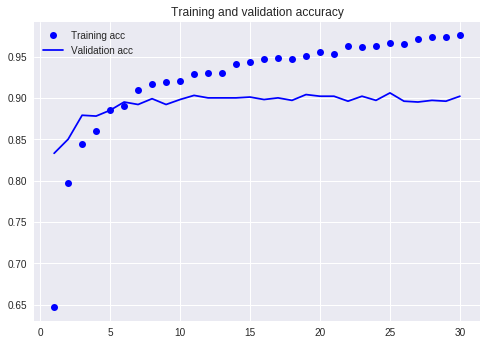

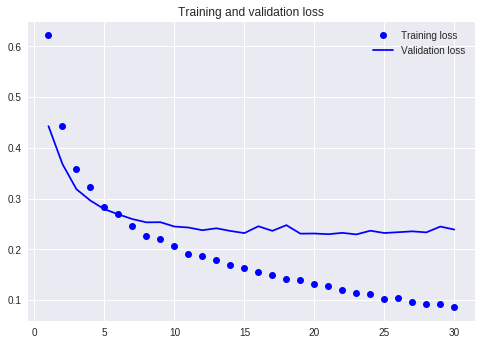

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### 3.2 FEATURE EXTRACTION WITH DATA AUGMENTATION

In [44]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


### Step 17: Freezing the conv_base layer to avoid losing parameters

In [45]:
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


### Step 18:  Training the model end to end with a frozen convolutional base

In [0]:
train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest')

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [48]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [49]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 35s 348ms/step - loss: 0.5776 - acc: 0.7175 - val_loss: 0.4400 - val_acc: 0.8540
Epoch 2/30
100/100 [==============================] - 32s 321ms/step - loss: 0.4847 - acc: 0.7850 - val_loss: 0.3637 - val_acc: 0.8680
Epoch 3/30
100/100 [==============================] - 33s 326ms/step - loss: 0.4279 - acc: 0.8105 - val_loss: 0.3298 - val_acc: 0.8760
Epoch 4/30
100/100 [==============================] - 32s 321ms/step - loss: 0.4084 - acc: 0.8260 - val_loss: 0.3032 - val_acc: 0.8870
Epoch 5/30
100/100 [==============================] - 32s 321ms/step - loss: 0.3908 - acc: 0.8315 - val_loss: 0.2868 - val_acc: 0.8920
Epoch 6/30
100/100 [==============================] - 32s 322ms/step - loss: 0.3572 - acc: 0.8410 - val_loss: 0.2790 - val_acc: 0.8910
Epoch 7/30
100/100 [==============================] - 32s 325ms/step - loss: 0.3660 - acc: 0.8360 - val_loss: 0.2718 - val_acc: 0.8980
Epoch 8/30
100/100 [==============================] - 3

### *Plotting results*

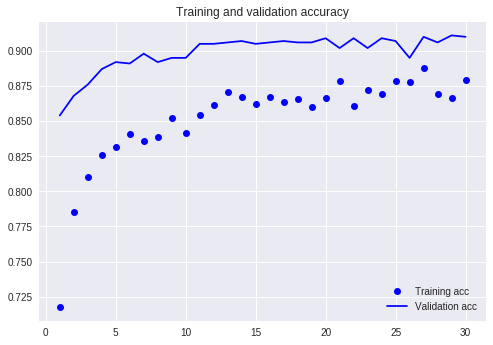

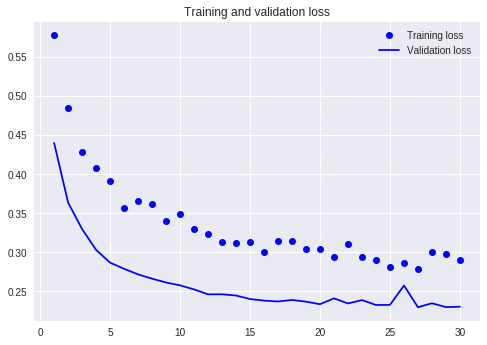

In [50]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Part 4: Fine-tuning

In [51]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

### Step 19: Freezing all layers up to a specific one

In [0]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

### Step 20: Fine-tunning the model

In [54]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])
history = model.fit_generator( train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 36s 358ms/step - loss: 0.2929 - acc: 0.8695 - val_loss: 0.2098 - val_acc: 0.9190
Epoch 2/100
100/100 [==============================] - 33s 325ms/step - loss: 0.2728 - acc: 0.8865 - val_loss: 0.3158 - val_acc: 0.8730
Epoch 3/100
100/100 [==============================] - 32s 323ms/step - loss: 0.2411 - acc: 0.9040 - val_loss: 0.1877 - val_acc: 0.9290
Epoch 4/100
100/100 [==============================] - 32s 318ms/step - loss: 0.2381 - acc: 0.9005 - val_loss: 0.2253 - val_acc: 0.9060
Epoch 5/100
100/100 [==============================] - 32s 318ms/step - loss: 0.1894 - acc: 0.9235 - val_loss: 0.1801 - val_acc: 0.9330
Epoch 6/100
100/100 [==============================] - 32s 319ms/step - loss: 0.2057 - acc: 0.9075 - val_loss: 0.1981 - val_acc: 0.9240
Epoch 7/100
100/100 [==============================] - 32s 323ms/step - loss: 0.1882 - acc: 0.9220 - val_loss: 0.1662 - val_acc: 0.9430
Epoch 8/100
100/100 [===========================

In [55]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9379999959468841
